https://github.com/MindSetLib/intern_test_3D_room

Ссылку на решение можно отправить в телеграм https://t.me/mindset_ai

https://hh.kz/vacancy/92010989?hhtmFrom=chat

In [14]:
import json
import os.path as osp

import cv2
import numpy as np
from matplotlib import pyplot as plt


def _show(image: np.ndarray, figsize=None):
    if figsize is None:
        figsize = (20, 36)
    plot_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=figsize)
    plt.imshow(plot_image)
    plt.show()


def _show_raw(image: np.ndarray, figsize=None):
    if figsize is None:
        figsize = (20, 36)
    plt.figure(figsize=figsize)
    plt.imshow(plot_image)
    plt.show()


def coords_to_np(coords: list, height: int, width: int, dtype: str = 'int') -> np.ndarray:
    np_coords = []
    for coord in coords:
        u_coord, v_coord = coord.get('x'), coord.get('y')
        assert u_coord is not None
        assert v_coord is not None
        x_coord = u_coord * width
        y_coord = (1 - v_coord) * height
        np_coords.append([x_coord, y_coord])
    return np.array(np_coords, dtype=dtype)


def draw_coords(coords: np.ndarray, image: np.ndarray, line_thickness: int = 10, point_thickness: int = 20) -> np.ndarray:
    out_image = image.copy()
    for (x_a, y_a), (x_b, y_b) in zip(coords, coords[1:]):
        cv2.line(out_image, (x_a, y_a), (x_b, y_b), (0, 255, 0), line_thickness)
    x_a, y_a = coords[0]
    cv2.line(out_image, (x_a, y_a), (x_b, y_b), (0, 255, 0), line_thickness)
    for s_x, s_y in coords:
        cv2.circle(out_image, (s_x, s_y), point_thickness, (0, 0, 255), -1)
    return out_image


In [20]:
_IMAGE_PATH = 'data/floor_plan_test.jpg'
_JSON_PATH = 'data/sample.json'


image = cv2.imread(_IMAGE_PATH)
heigth, width = image.shape[:2]

with open(_JSON_PATH) as label_file:
    label = json.load(label_file)


coords = list(label.get('walls').values())
print(coords)

# plot_image = draw_coords(coords[0], image)
# _show(plot_image)


[[0, 0, 0, 2050], [0, 0, 1640, 0], [1640, 0, 1640, 400], [1640, 400, 6020, 400], [6020, 400, 6020, 2050], [0, 2050, 6020, 2050]]


In [2]:
def _get_dist(point1: np.ndarray, point2: np.ndarray) -> float:
    return np.sqrt(((point1[0] - point2[0]) ** 2) + ((point1[1] - point2[1]) ** 2))


def warp_from_coords(image: np.ndarray, coords: np.ndarray) -> np.ndarray:
    # TODO: sort coords in the following order
    tl, tr, br, bl = coords
    width_a = _get_dist(br, bl)
    width_b = _get_dist(tr, tl)
    height_a = _get_dist(tr, br)
    height_b = _get_dist(tl, bl)
    # take the maximum of the width and height values to reach
    # our final dimensions
    max_width = max(int(width_a), int(width_b))
    max_height = max(int(height_a), int(height_b))
    dest_coeff = np.array([
        [0, 0],
        [max_width - 1, 0],
        [max_width - 1, max_height - 1],
        [0, max_height - 1]],
        dtype=np.float32)
    m_t = cv2.getPerspectiveTransform(coords.astype(np.float32), dest_coeff)
    return cv2.warpPerspective(image.copy(), m_t, (max_width, max_height))

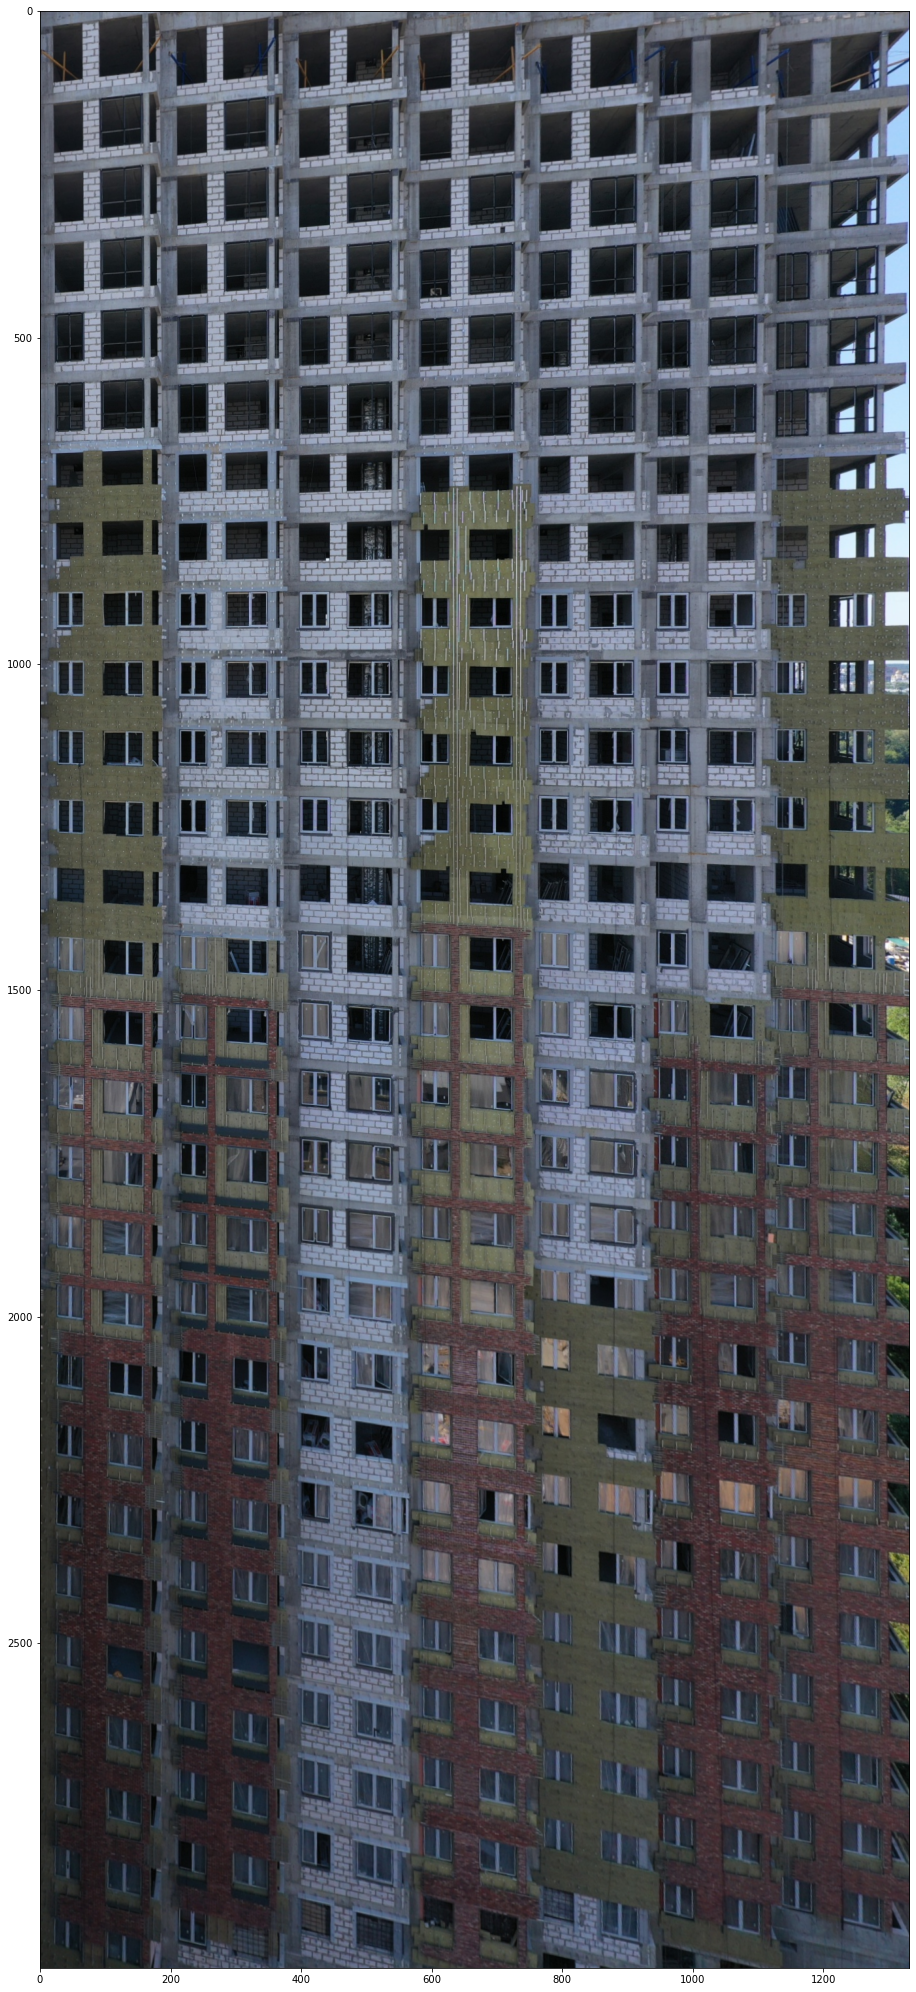

In [3]:
warped = warp_from_coords(image, coords)
_show(warped)